<a href="https://colab.research.google.com/github/Anishi2528/Anishi2528/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 4: TITANIC -MACHINE LEARNING DISASTER**

Importing Libraries


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

from xgboost import XGBClassifier
from xgboost import plot_importance

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

Importing Dataset

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving train.csv to train.csv


In [ ]:
import io
train_df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving test.csv to test.csv


In [ ]:
import io
test_df=pd.read_csv(io.BytesIO(uploaded['test.csv']))

Performing Data Preprocessing  over **train** dataset

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.shape

(891, 12)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


performing Data Preprocessing over **test** dataset

In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_df.shape

(418, 11)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Below is a brief information about each columns of the dataset:**

**PassengerID**: An unique index for passenger rows.

**Survived**: Shows if the passenger survived or not. 1 for survived and 0 for not survived.

**Pclass**: Ticket class. 1 for First class ticket. 2 for Second class ticket. 3 for Third class ticket.

**Name**: Passenger's name. Name also contain title. "Mr" for man. "Mrs" for woman. "Miss" for girl. "Master" for boy.

**Sex**: Passenger's sex. It's either Male or Female.

**Age**: Passenger's age. "NaN" values in this column indicates that the age of that particular passenger has not been recorded.

**SibSp**: Number of siblings or spouses travelling with each passenger.

**Parch**: Number of parents of children travelling with each passenger.

**Ticket**: Ticket number.

**Fare**: How much money the passenger has paid for the travel journey.

**Cabin**: Cabin number of the passenger. "NaN" values in this column indicates that the cabin number of that particular passenger has not been recorded.

**Embarked**: Port from where the particular passenger boarded.

**Relationship between Features and Survival(Target)**

Here, we analyze relation between different features with respect to Survival(Target). We also plot different kinds of graphs to visualize our data and findings and relations.

In [ ]:
survived = train_df[train_df['Survived'] == 1]
not_survived = train_df[train_df['Survived'] == 0]

print ("Survived: %i (%.1f%%)"%(len(survived), float(len(survived))/len(train_df)*100.0))
print ("Not Survived: %i (%.1f%%)"%(len(not_survived), float(len(not_survived))/len(train_df)*100.0))
print ("Total: %i"%len(train_df))

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total: 891


**1. Pcclass vs Survival**

In [ ]:
train_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
pclass_survived = train_df.groupby('Pclass').Survived.value_counts()
pclass_survived

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

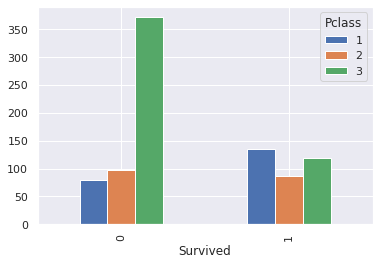

In [ ]:
# plotting 
pclass_survived.unstack(level=0).plot(kind='bar', subplots=False)

In [ ]:
pclass_survived_average = train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()
pclass_survived_average

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


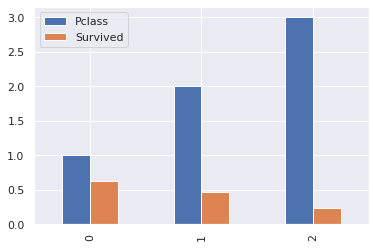

In [ ]:
pclass_survived_average.plot(kind='bar', subplots=False)

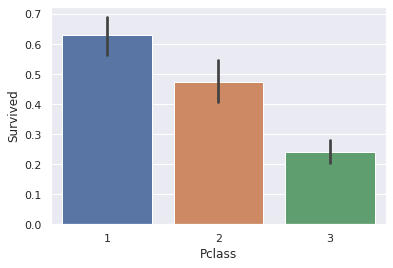

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

**NOTE**: Higher class passengers (low Pclass, 1 being the lowest) have better average survival than the low class passengers

**2.Embarked vs Survival**

In [ ]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
train_df.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [ ]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


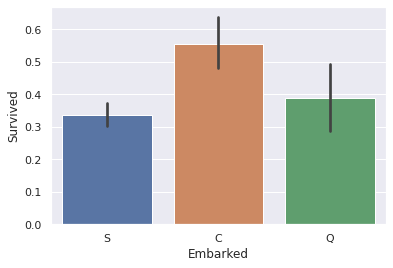

In [ ]:
#plotting
sns.barplot(x='Embarked', y='Survived', data=train_df)

**Note**: Passengers who boarded or embarked through Port C have better survival chances than who boarded from Port S and Port Q.

**3. Sex vs Survival**

In [ ]:
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
sex_survival = train_df.groupby('Sex').Survived.value_counts()
sex_survival

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3c270d2d0>,
      dtype=object)

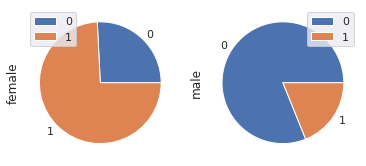

In [ ]:
sex_survival.unstack(level=0).plot(kind='pie', subplots=True)

In [ ]:
sex_survived_average = train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()
sex_survived_average

,Sex,Survived
0,female,0.742038
1,male,0.188908


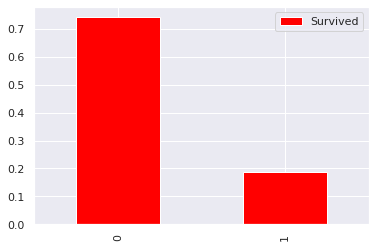

In [ ]:
sex_survived_average.plot(kind='bar', subplots=False, color='red')

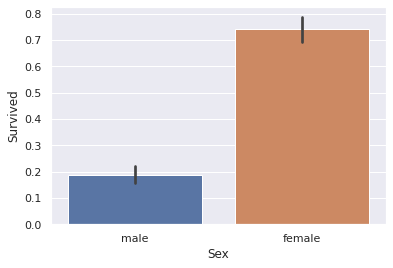

In [ ]:
sns.barplot(x='Sex', y='Survived', data=train_df)

**NOTE**: Females have better survival rate as comapared to males

**4. Pclass, Sex & Embarked vs. Survival**

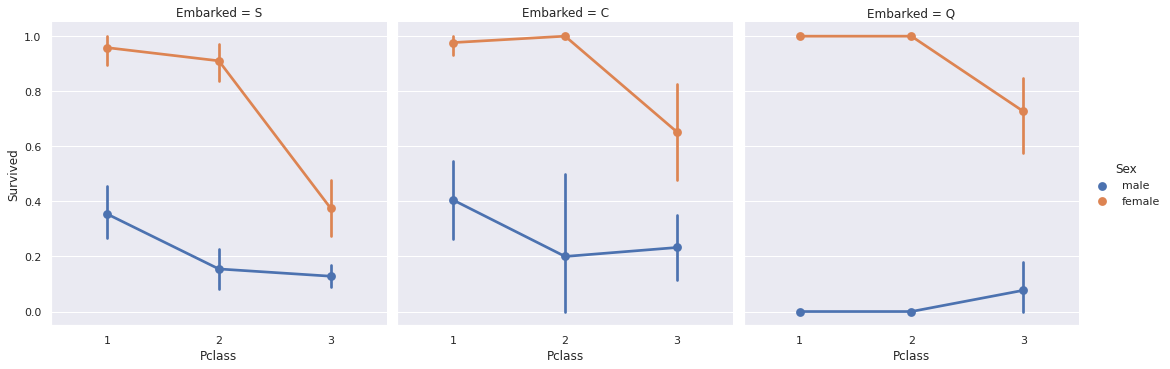

In [ ]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train_df)

**NOTE:**

In any embarked port , and of any Pcclass, male have less survival rate as compared to females.

Males from Pclass 1 only have slightly higher survival chance than Pclass 2 and 3.

Mostly all women survived, of Pcclass 1 and 2.

**5. Parch vs Survival**

In [ ]:
train_df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
train_df.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [ ]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


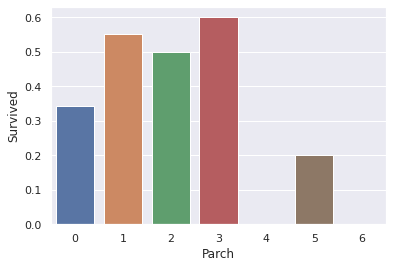

In [ ]:
sns.barplot(x='Parch', y='Survived', ci=None,data=train_df) 

**6.SibSp vs Survival**

In [ ]:
train_df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
train_df.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [ ]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


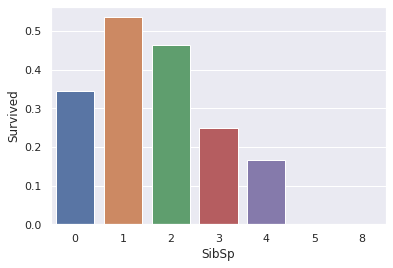

In [ ]:
sns.barplot(x='SibSp', y='Survived', ci=None, data=train_df)

**NOTE:** if number of sibling or spouse travelling with the passenger is 1 or 2, then that passenger has higher chance of survival.

**7.Age vs Survival**

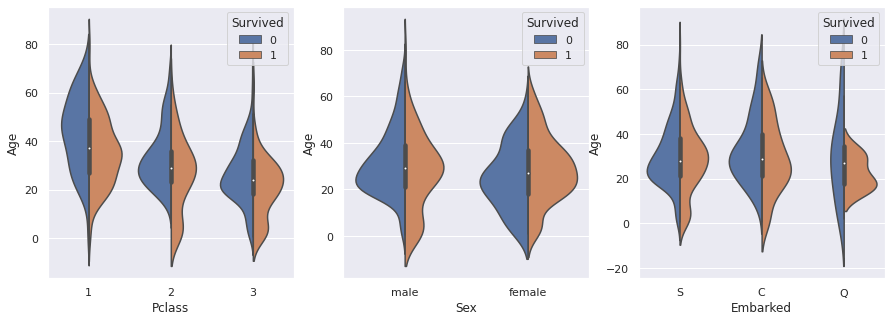

In [ ]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train_df, split=True, ax=ax1)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train_df, split=True, ax=ax2)
sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train_df, split=True, ax=ax3)

In [ ]:
total_survived = train_df[train_df['Survived']==1]
total_not_survived = train_df[train_df['Survived']==0]

male_survived = train_df[(train_df['Survived']==1) & (train_df['Sex']=="male")]
female_survived = train_df[(train_df['Survived']==1) & (train_df['Sex']=="female")]

male_not_survived = train_df[(train_df['Survived']==0) & (train_df['Sex']=="male")]
female_not_survived = train_df[(train_df['Survived']==0) & (train_df['Sex']=="female")]

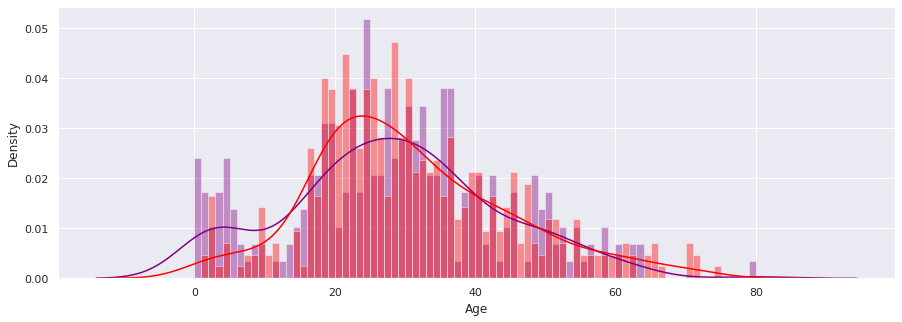

In [ ]:
plt.figure(figsize=[15,5])
plt.subplot(111)
sns.distplot(total_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='purple')
sns.distplot(total_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='red', axlabel='Age')

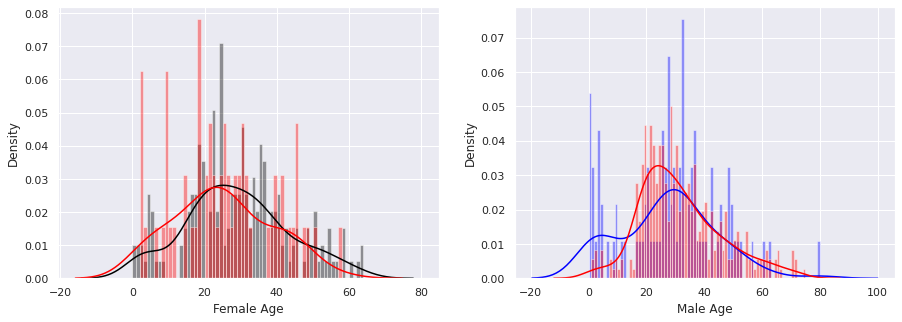

In [ ]:
plt.figure(figsize=[15,5])

plt.subplot(121)
sns.distplot(female_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='black')
sns.distplot(female_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='red', axlabel='Female Age')

plt.subplot(122)
sns.distplot(male_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='blue')
sns.distplot(male_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='red', axlabel='Male Age')

**NOTE :**

Males with age between 0 to 14 have better chance of survival.

Females with age between "18 to 40" and "50 and above" have higher chance of survival.

**Correlating the features**

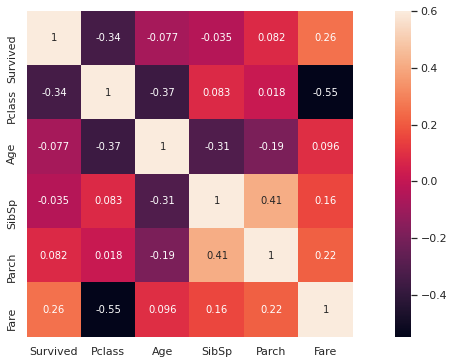

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(train_df.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True,color='purple')

**Combining the train and test dataset**

In [ ]:
# combining train and test datase
total_data = [train_df, test_df]

**Dealing with Features, like filling the NaN Values**

  **1. Extracting titles from Name column.**

In [ ]:

for dataset in total_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.')

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


**NOTE:** New coloumn has been added as Title, for holding titles which are being extracted from the Name coloumn.

In [ ]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
for dataset in total_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


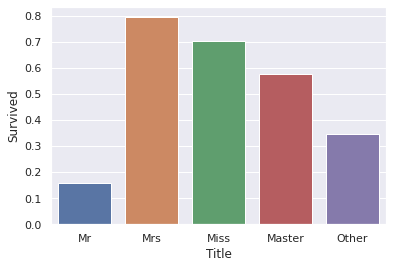

In [ ]:
sns.barplot(x='Title', y='Survived', ci=None, data=train_df)

**NOTE:** As evident ,Title column is categorigal datatype,so changing it to the numeric datatype.

In [ ]:
title_mapping = {"Mrs": 1, "Miss": 2, "Mr": 3, "Master": 4, "Other": 5}
for dataset in total_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [ ]:
titanic_dataset=pd.concat([train_df,test_df],axis=0,ignore_index=True, sort=True)

**2. Dealing with the missing values of the Embarked Column.**

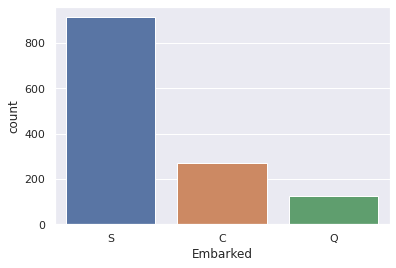

In [ ]:
sns.countplot(x='Embarked', data=titanic_dataset)

**NOTE:**Since the maximum value in Embarked column is of 'S' , so replacing the missing values of Embarked column with S

In [ ]:
titanic_dataset['Embarked'] = titanic_dataset['Embarked'].fillna(value='S')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

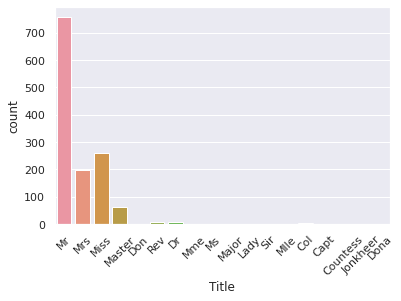

In [ ]:
import re

titanic_dataset['Title'] = titanic_dataset.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

sns.countplot(x='Title', data=titanic_dataset);
plt.xticks(rotation=45)

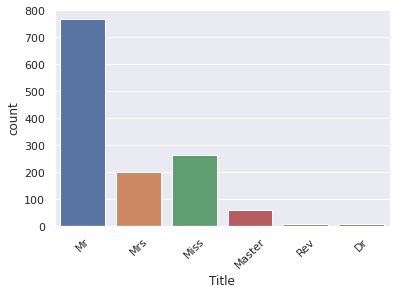

In [ ]:
titanic_dataset['Title'] = titanic_dataset['Title'].replace({'Mlle': 'Miss', 
                                                   'Major': 'Mr', 
                                                   'Col': 'Mr', 
                                                   'Sir': 'Mr', 
                                                   'Don': 'Mr', 
                                                   'Mme': 'Miss', 
                                                   'Jonkheer': 'Mr', 
                                                   'Lady': 'Mrs', 
                                                   'Capt': 'Mr', 
                                                   'Countess': 'Mrs', 
                                                   'Ms': 'Miss', 
                                                   'Dona': 'Mrs'})

sns.countplot(x='Title', data=titanic_dataset);
plt.xticks(rotation=45);

In [ ]:
# Impute "Age" by median of Age of Name's Title group

titles = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rev']
for title in titles:
    age_to_impute = titanic_dataset.groupby('Title')['Age'].median()[titles.index(title)]
    titanic_dataset.loc[(titanic_dataset['Age'].isnull()) & (titanic_dataset['Title'] == title), 'Age'] = age_to_impute
    titanic_dataset['Familial'] = (titanic_dataset['SibSp'] + titanic_dataset['Parch']) > 0

medianFare = titanic_dataset[titanic_dataset['Pclass'] == 3]['Fare'].median()
titanic_dataset['Fare'] = titanic_dataset['Fare'].fillna(value = medianFare)

custom_bucket_array = np.linspace(0, 80, 17)
titanic_dataset['CatAge'] = pd.cut(titanic_dataset['Age'], custom_bucket_array)
labels, levels = pd.factorize(titanic_dataset['CatAge'])
titanic_dataset['CatAge'] = labels
custom_bucket_array

array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.,
       65., 70., 75., 80.])

In [ ]:
custom_bucket_array = np.linspace(0, 520, 53)
titanic_dataset['CatFare'] = pd.cut(titanic_dataset['Fare'], custom_bucket_array)
labels, levels = pd.factorize(titanic_dataset['CatFare'])
titanic_dataset['CatFare'] = labels
custom_bucket_array

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
       220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
       330., 340., 350., 360., 370., 380., 390., 400., 410., 420., 430.,
       440., 450., 460., 470., 480., 490., 500., 510., 520.])

In [ ]:
titanic_dataset['SexBool'] = titanic_dataset['Sex'].map({'male': 0, 'female': 1})
titanic_dataset['EmbarkedInt'] = titanic_dataset['Embarked'].map({'S': 0, 'C': 1, 'Q':2})
titanic_dataset['TitleInt'] = titanic_dataset['Title'].map({'Mr':0, 'Mrs':1, 'Miss':2, 'Master':3, 'Rev':4, 'Dr':5})
train_df_new = titanic_dataset.loc[titanic_dataset['PassengerId'] <= len(train_df)]
test_df_new = titanic_dataset.loc[titanic_dataset['PassengerId'] > len(train_df)].iloc[:, titanic_dataset.columns != 'Survived']

(len(train_df_new), len(test_df_new))


(891, 418)

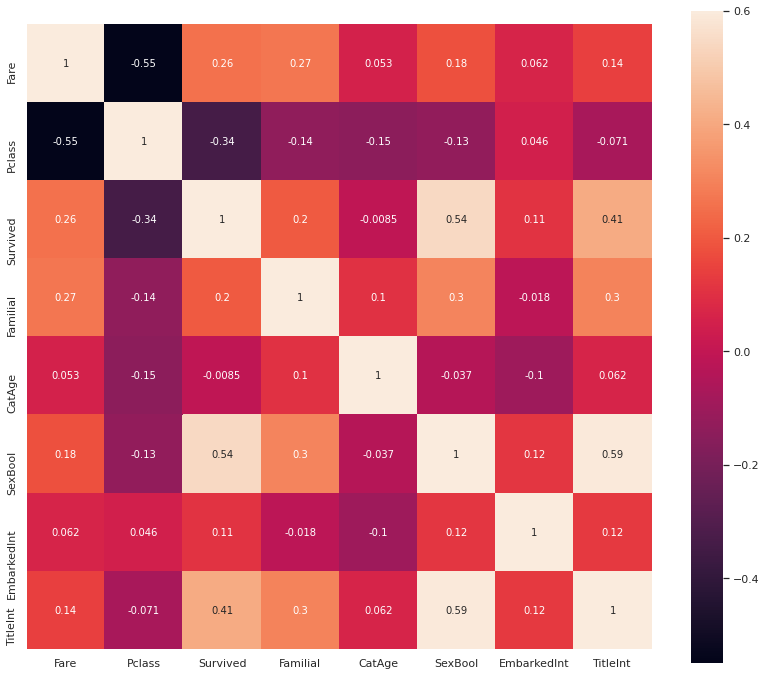

In [ ]:
plt.figure(figsize=(14,12))
foo = sns.heatmap(train_df_new.drop(['PassengerId', 'Name', 'Title', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'CatFare', 'Cabin', 'Embarked'],axis=1).corr(), vmax=0.6, square=True, annot=True)

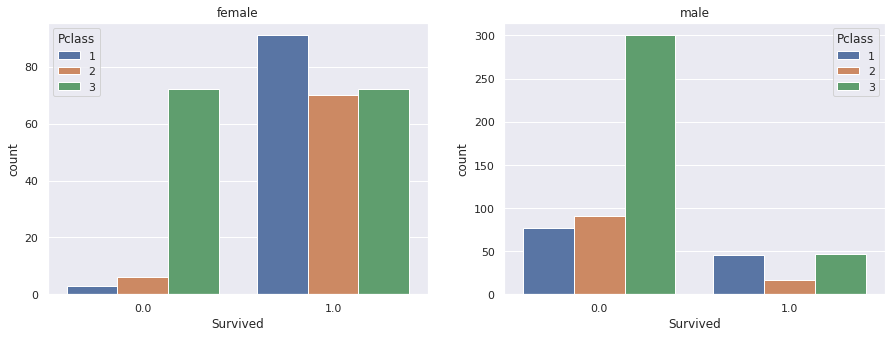

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
axs[0].set_title('female')
sns.countplot(x='Survived', hue='Pclass', data=titanic_dataset.loc[titanic_dataset['Sex'] == 'female'], ax=axs[0])
axs[1].set_title('male')
sns.countplot(x='Survived', hue='Pclass', data=titanic_dataset.loc[titanic_dataset['Sex'] == 'male'], ax=axs[1])

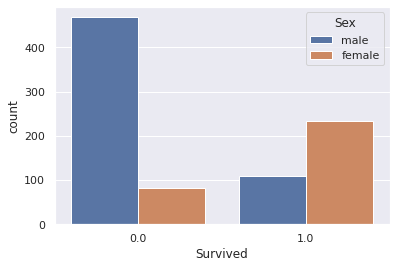

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=titanic_dataset)

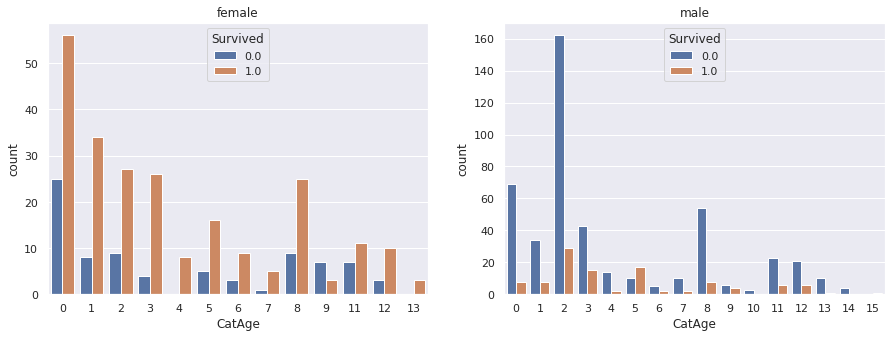

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
axs[0].set_title('female')
sns.countplot(x='CatAge', hue='Survived', data=train_df_new.loc[train_df_new['Sex'] == 'female'], ax=axs[0])
axs[1].set_title('male')
sns.countplot(x='CatAge', hue='Survived', data=train_df_new.loc[train_df_new['Sex'] == 'male'], ax=axs[1])

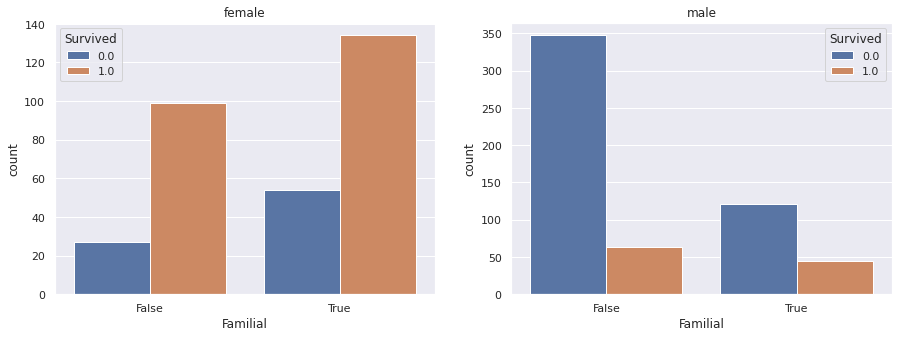

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
axs[0].set_title('female')
sns.countplot(x='Familial', hue='Survived', data=train_df_new.loc[train_df_new['Sex'] == 'female'], ax=axs[0])
axs[1].set_title('male')
sns.countplot(x='Familial', hue='Survived', data=train_df_new.loc[train_df_new['Sex'] == 'male'], ax=axs[1])

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3


**3.We convert the categorical value of Sex into numeric. We represent 0 as female and 1 as male.**

In [ ]:
for dataset in total_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,3


There are empty values for some rows for Embarked column. The empty values are represented as "nan" in below list.

In [ ]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
for dataset in total_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,3


In [ ]:
for dataset in total_data:
    #print(dataset.Embarked.unique())
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,3


 We first fill the NULL values of Age with a random number between (mean_age - std_age) and (mean_age + std_age).
We then create a new column named AgeBand. This categorizes age into 5 different age range. 

In [ ]:
for dataset in total_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)

print (train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.527273
1   (16.0, 32.0]  0.350446
2   (32.0, 48.0]  0.379447
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0,3,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1,1,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0,2,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0,1,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0,3,"(32.0, 48.0]"


Now, we map Age according to AgeBand

In [ ]:
for dataset in total_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,3,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,1,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,2,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,1,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,3,"(32.0, 48.0]"


**4. Replace missing Fare values with the median of Fare.**

In [ ]:
for dataset in total_data:
    dataset['Fare'] = dataset['Fare'].fillna(train_df['Fare'].median())

Now, Create FareBand. We divide the Fare into 4 category range.

In [ ]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
print (train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


Map Fare according to FareBand

In [ ]:
for dataset in total_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,3,"(16.0, 32.0]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,1,1,"(32.0, 48.0]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0,2,"(16.0, 32.0]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,0,1,"(32.0, 48.0]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,0,3,"(32.0, 48.0]","(7.91, 14.454]"


**5.Combining SibSp & Parch feature, we create a new feature named FamilySize.**

In [ ]:
for dataset in total_data:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1

print (train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


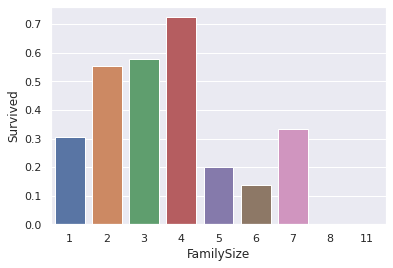

In [ ]:
sns.barplot(x='FamilySize', y='Survived', ci=None, data=train_df)

In [ ]:
for dataset in total_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
print (train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


NOTE:This shows that travelling alone has only 30% survival chance.

**6.We drop unnecessary columns/features and keep only the useful ones for our experiment.**

In [ ]:
features_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FamilySize']
train_df= train_df.drop(features_drop, axis=1)
test_df= test_df.drop(features_drop, axis=1)
train_df = train_df.drop(['PassengerId', 'AgeBand', 'FareBand'], axis=1)

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,3,0
1,1,1,1,2,3,1,1,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,1,0
4,0,3,0,2,1,0,3,1


In [ ]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,2,3,1
1,893,3,1,2,0,0,1,0
2,894,2,0,3,1,2,3,1
3,895,3,0,1,1,0,3,1
4,896,3,1,1,1,0,1,0


**NOTE**: We are done with Feature Selection/Engineering.
Now, we are ready to train a classifier with our feature set.

**Classification** 


**1. Splitting data into training and testing dataset.**

In [ ]:
X_train = train_df.drop('Survived', axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop("PassengerId", axis=1).copy()

X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

2. **Following Classification algorithms have been chosen for our problem statement:**

1.Logistic Regression

2.Support Vector Machines (SVC)

3.Random Forest

4.XGBOOST


In [ ]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

**A.Logistic Regression**

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, Y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_train, Y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_log_reg) + '%')

Train Accuracy: 79.01%


**B. Support Vector Machine (SVM)**

In [ ]:
clf = SVC()
clf.fit(X_train, Y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, Y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_svc) + '%')

Train Accuracy: 81.26%


**C.Random Forest**


In [ ]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, Y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_random_forest) + '%')

Train Accuracy: 87.09%


**D.XGBoost  (Using both Cross Validation and GridSearchCV)**



Features Selection for Model Learning

In [ ]:
Columns = ['SexBool', 'Pclass', 'Fare', 'CatAge', 'Familial', 'EmbarkedInt', 'TitleInt']
Label = 'Survived'

train_X = train_df_new.loc[:, train_df_new.columns != 'Survived']
train_Y = train_df_new['Survived']

In [ ]:
model = XGBClassifier()

both_scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Loss':'neg_log_loss'}
params = {
        'n_estimators': [100, 200, 500, 1000, 1500],
        'learning_rate': [0.05, 0.1, 0.2]
        #'max_depth':[3, 4, 5]
        }

In [ ]:
clf = GridSearchCV(model, params, cv=5, scoring=both_scoring, refit='AUC', return_train_score=True)
clf.fit(train_X[Columns], train_Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'n_estimators': [100, 200, 500, 1000, 1500]},
             pre_dispatch='2*n_jobs', refit='A

In [ ]:
print((clf.best_score_, clf.best_params_))
print("="*30)

print("Grid scores on training data:")
means = clf.cv_results_['mean_test_AUC']
stds = clf.cv_results_['std_test_AUC']
log_losses = clf.cv_results_['std_test_Loss']

for mean, std, log_loss, params in zip(means, stds, log_losses, clf.cv_results_['params']):
    print("AUC Score: %0.3f (+/-%0.03f); Log Loss: %0.3f for %r" % (mean, std * 2, log_loss, params))

(0.8739526918211894, {'learning_rate': 0.1, 'n_estimators': 200})
Grid scores on training data:
AUC Score: 0.870 (+/-0.050); Log Loss: 0.038 for {'learning_rate': 0.05, 'n_estimators': 100}
AUC Score: 0.869 (+/-0.061); Log Loss: 0.049 for {'learning_rate': 0.05, 'n_estimators': 200}
AUC Score: 0.874 (+/-0.058); Log Loss: 0.058 for {'learning_rate': 0.05, 'n_estimators': 500}
AUC Score: 0.872 (+/-0.058); Log Loss: 0.067 for {'learning_rate': 0.05, 'n_estimators': 1000}
AUC Score: 0.871 (+/-0.060); Log Loss: 0.079 for {'learning_rate': 0.05, 'n_estimators': 1500}
AUC Score: 0.870 (+/-0.061); Log Loss: 0.050 for {'learning_rate': 0.1, 'n_estimators': 100}
AUC Score: 0.874 (+/-0.058); Log Loss: 0.055 for {'learning_rate': 0.1, 'n_estimators': 200}
AUC Score: 0.872 (+/-0.061); Log Loss: 0.068 for {'learning_rate': 0.1, 'n_estimators': 500}
AUC Score: 0.869 (+/-0.063); Log Loss: 0.087 for {'learning_rate': 0.1, 'n_estimators': 1000}
AUC Score: 0.865 (+/-0.061); Log Loss: 0.092 for {'learning

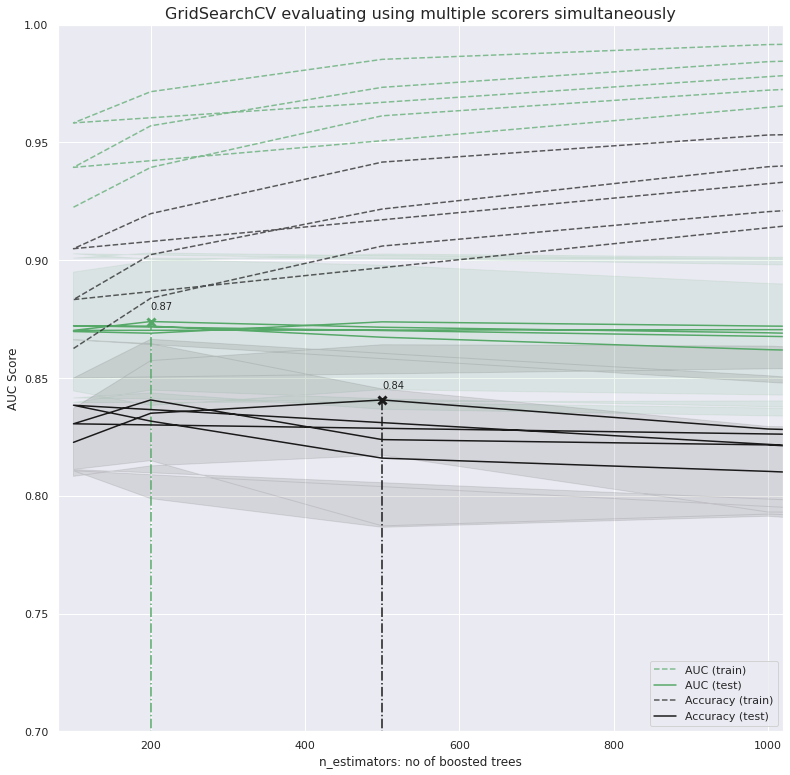

In [ ]:
results = clf.cv_results_

plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously", fontsize=16)

plt.xlabel("n_estimators: no of boosted trees")
plt.ylabel("AUC Score")

ax = plt.gca()
ax.set_xlim(80, 1020)
ax.set_ylim(0.7, 1)

X_axis = np.array(results['param_n_estimators'].data, dtype=float)

for scorer, color in zip(sorted(both_scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]
 # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

In [ ]:
clf = Perceptron(max_iter=5, tol=None)
clf.fit(X_train, Y_train)
y_pred_perceptron = clf.predict(X_test)
acc_XGB = round(clf.score(X_train, Y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_XGB) + '%')

Train Accuracy: 70.26%


In [ ]:
predictions = clf.predict(test_df_new[Columns]).astype(int)

submission = pd.DataFrame({'PassengerId':test_df_new['PassengerId'], 'Survived':predictions})

**3.Comparing Models**

In [ ]:
models = pd.DataFrame({
  'Model': ['Logistic Regression', 'SVM',
            'Random Forrest','XGBOOST'],
    
    'Score': [acc_log_reg, acc_svc, acc_random_forest,acc_XGB]
    })


models = models.sort_values(by='Score', ascending=False)
models

,Model,Score
2,Random Forrest,87.09
1,SVM,81.26
0,Logistic Regression,79.01
3,XGBOOST,70.26


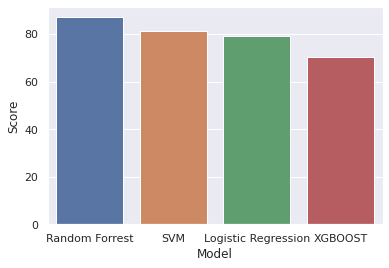

In [ ]:
sns.barplot(x='Model', y='Score', ci=None, data=models)

**Conclusion**: As evident from the barplot and also from the  table above that , Random Forest algorithm (87.09% accurate) and SVM(81.26% accurate) , is much better to be used as classifying algorithm for our problem statement.